In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [4]:
path = "./TEST/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [5]:
# Example parameters for BirdNET
BirdNET_parameters = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "lat" : 35.4244,
   "lon" : -120.7463,
   "week" : 18,
   "min_conf" : 0.1,
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : False
}

# Example Parameters for Microfaune
Microfaune_parameters = {
     "model" :          "microfaune",
     "technique" :       "steinberg",
     "threshold_type" :  "median",
     "threshold_const" : 2.0,
     "threshold_min" :   0.0,
     "window_size" :     2.0,
     "chunk_size" :      5.0,
     "verbose"     :     True
}

# Example parameters for TweetyNET
TweetyNET_parameters = {
    "model" : "tweetynet",
    "tweety_output": True,
   "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
}

isolation_parameters = BirdNET_parameters

### Pandas Ouput of Automated Labeling 

In [9]:
automated_df = generate_automated_labels(path,isolation_parameters);

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... Path:  /Users/tzhang04/Desktop/e4e_ASID/PyHa/TEST/ScreamingPiha9.wav
No module named 'resampy'

This error is lazily reported, having originally occured in
  File /Users/tzhang04/miniconda3/envs/asid/lib/python3.8/site-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")
READING AUDIO DATA... Path:  /Users/tzhang04/Desktop/e4e_ASID/PyHa/TEST/ScreamingPiha8.wav
No module named 'resampy'

This error is lazily reported, having originally occured in
  File /Users/tzhang04/miniconda3/envs/asid/lib/python3.8/site-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")
READING AUDIO DATA... Path:  /Users/tzhang04/Desktop/e4e_ASID/PyHa/TEST/ScreamingPiha10.wav
No module named 'resampy'

This error is lazily reported, having originally occured in
  File /Users/tzhang04/miniconda3/envs/asid/lib/python3.8/site-packages/librosa/core/audio.py, line 32, in <module>

----> res

In [7]:
automated_df

Empty DataFrame
Columns: [FOLDER, IN FILE, CLIP LENGTH, CHANNEL, OFFSET, DURATION, SAMPLE RATE, MANUAL ID]
Index: []

### Function that gathers statistics about the duration of annotations

In [8]:
annotation_duration_statistics(automated_df)

/Users/tzhang04/Desktop/e4e_ASID/PyHa/PyHa/statistics.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],


IndexError: index 0 is out of bounds for axis 0 with size 0

### Function that converts annotations into 3 second chunks

In [ ]:
annotation_chunker(automated_df, 3)

IN FILE  CLIP LENGTH  CHANNEL  OFFSET  DURATION  SAMPLE RATE  \
0    ScreamingPiha9.wav    37.302857        0     0.0       3.0        44100   
1    ScreamingPiha9.wav    37.302857        0     3.0       3.0        44100   
2    ScreamingPiha9.wav    37.302857        0     6.0       3.0        44100   
3    ScreamingPiha9.wav    37.302857        0     9.0       3.0        44100   
4    ScreamingPiha9.wav    37.302857        0    12.0       3.0        44100   
..                  ...          ...      ...     ...       ...          ...   
180  ScreamingPiha5.wav    54.177959        0    51.0       3.0        44100   
181  ScreamingPiha4.wav    13.557551        0     0.0       3.0        44100   
182  ScreamingPiha4.wav    13.557551        0     3.0       3.0        44100   
183  ScreamingPiha4.wav    13.557551        0     6.0       3.0        44100   
184  ScreamingPiha4.wav    13.557551        0     9.0       3.0        44100   

    MANUAL ID  
0        bird  
1        bird  
2        bird  
3        bird  
4        bird  
..        ...  
180      bird  
181      bird  
182      bird  
183      bird  
184      bird  

[185 rows x 7 columns]

### Human Manual Labels for Comparison 

In [ ]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

FOLDER             IN FILE  CLIP LENGTH  CHANNEL   OFFSET  DURATION  \
0    ./TEST/  ScreamingPiha1.wav      32.6160        0   1.5448    2.1297   
1    ./TEST/  ScreamingPiha1.wav      32.6160        0  10.1638    0.8498   
2    ./TEST/  ScreamingPiha1.wav      32.6160        0   0.5549    0.9999   
3    ./TEST/  ScreamingPiha1.wav      32.6160        0   8.7739    0.8399   
4    ./TEST/  ScreamingPiha1.wav      32.6160        0  12.6335    1.9997   
..       ...                 ...          ...      ...      ...       ...   
249  ./TEST/  ScreamingPiha2.wav      33.9331        0  26.9274    1.7602   
250  ./TEST/  ScreamingPiha2.wav      33.9331        0  30.8178    0.7200   
251  ./TEST/  ScreamingPiha2.wav      33.9331        0  29.8677    0.9401   
252  ./TEST/  ScreamingPiha2.wav      33.9331        0  31.5378    1.9502   
253  ./TEST/  ScreamingPiha2.wav      33.9331        0  33.7880    0.1100   

     SAMPLE RATE MANUAL ID  
0          16000      bird  
1          16000      bird  
2          16000      bird  
3          16000      bird  
4          16000      bird  
..           ...       ...  
249        44100      bird  
250        44100      bird  
251        44100      bird  
252        44100      bird  
253        44100      bird  

[254 rows x 8 columns]

In [ ]:
annotation_duration_statistics(manual_df)

/Users/tzhang04/Desktop/e4e_ASID/PyHa/PyHa/statistics.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],


COUNT  MODE      MEAN  STANDARD DEVIATION   MIN        Q1   MEDIAN  \
0    254  1.87  1.068224            0.664488  0.11  0.532475  0.78005   

         Q3     MAX  
0  1.767475  3.1199

### Histogram Visualization of Annotation Lengths

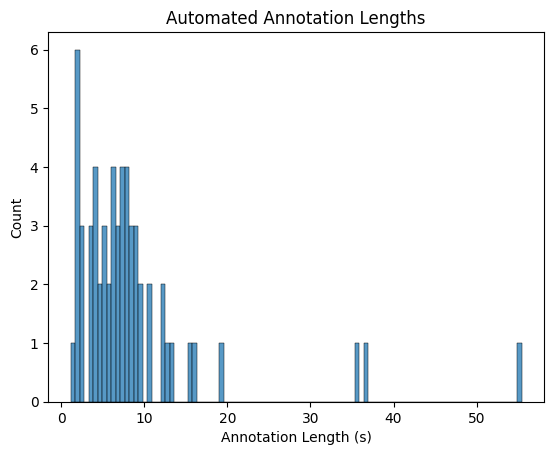

In [ ]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

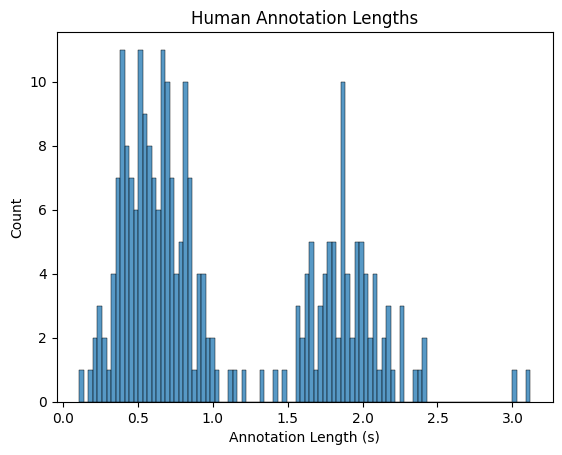

In [ ]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [ ]:
kaleidoscope_conversion(manual_df)

FOLDER             IN FILE  CHANNEL   OFFSET  DURATION MANUAL ID
0    ./TEST  ScreamingPiha1.wav        0   1.5448    2.1297      bird
1    ./TEST  ScreamingPiha1.wav        0  10.1638    0.8498      bird
2    ./TEST  ScreamingPiha1.wav        0   0.5549    0.9999      bird
3    ./TEST  ScreamingPiha1.wav        0   8.7739    0.8399      bird
4    ./TEST  ScreamingPiha1.wav        0  12.6335    1.9997      bird
..      ...                 ...      ...      ...       ...       ...
249  ./TEST  ScreamingPiha2.wav        0  26.9274    1.7602      bird
250  ./TEST  ScreamingPiha2.wav        0  30.8178    0.7200      bird
251  ./TEST  ScreamingPiha2.wav        0  29.8677    0.9401      bird
252  ./TEST  ScreamingPiha2.wav        0  31.5378    1.9502      bird
253  ./TEST  ScreamingPiha2.wav        0  33.7880    0.1100      bird

[254 rows x 6 columns]

## Different Combinations of Spectrogram and Local Score Visualization Graphs
Note: Not all models support local score arrays.

### Baseline Graph without any annotations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


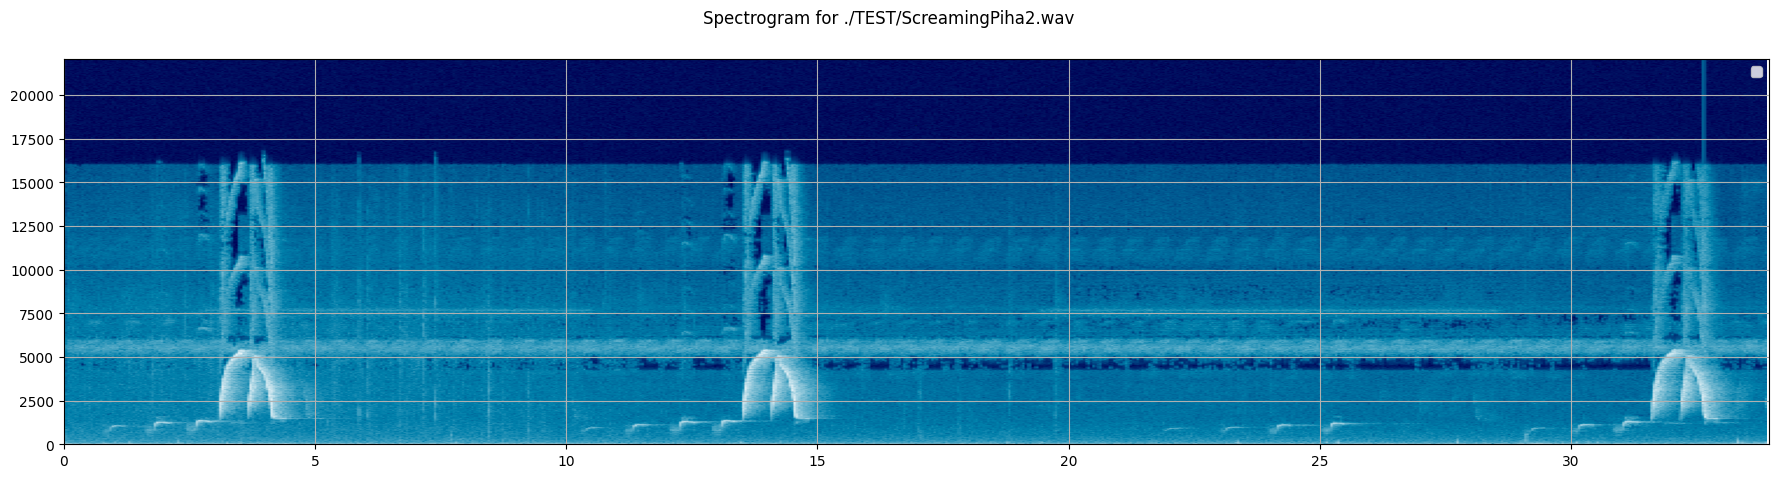

In [ ]:
clip_path = "./TEST/ScreamingPiha2.wav"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

1/1 [==============================] - 0s 413ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


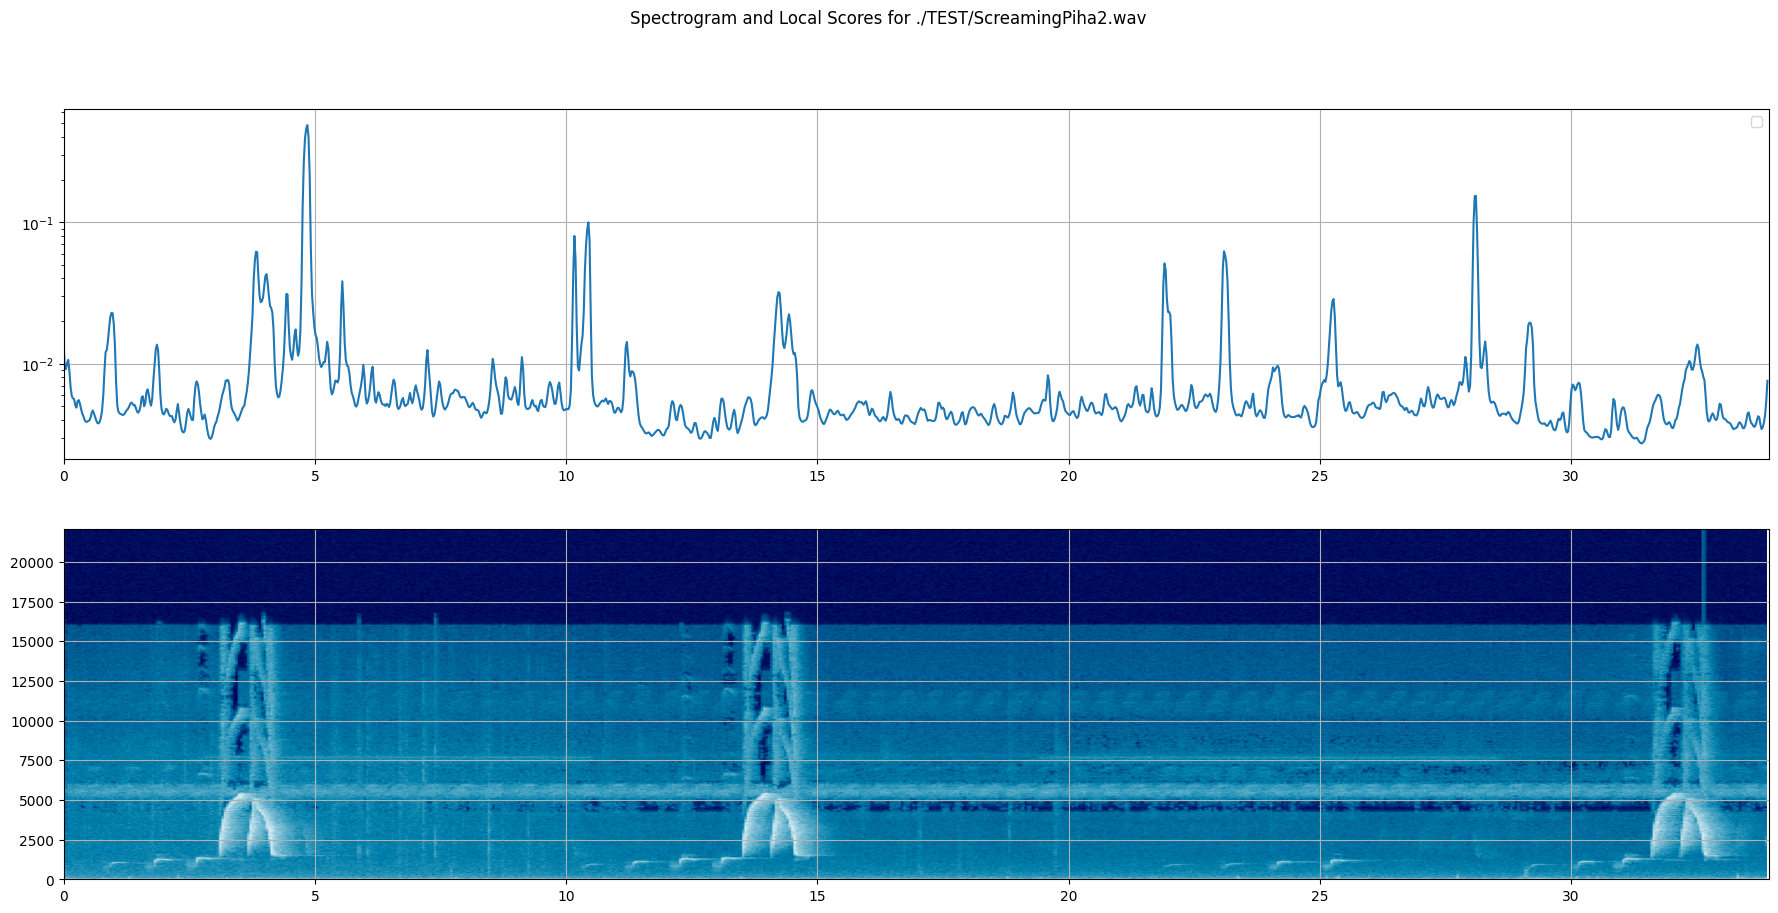

In [ ]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

1/1 [==============================] - 0s 425ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


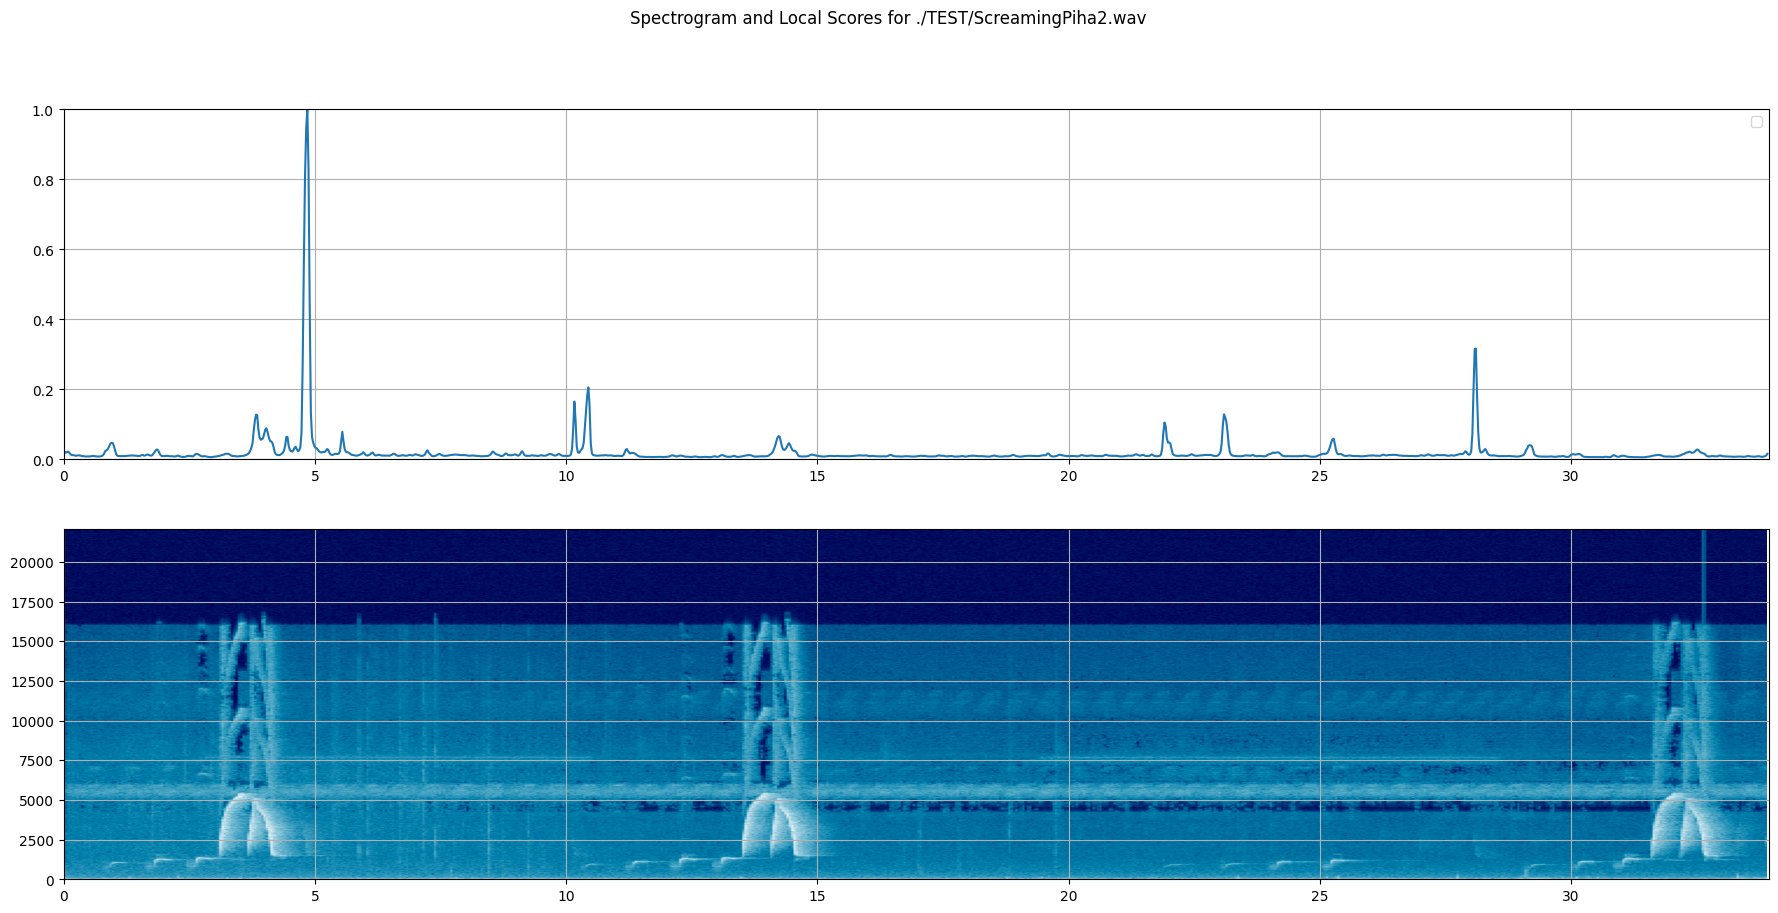

In [ ]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

1/1 [==============================] - 0s 431ms/step


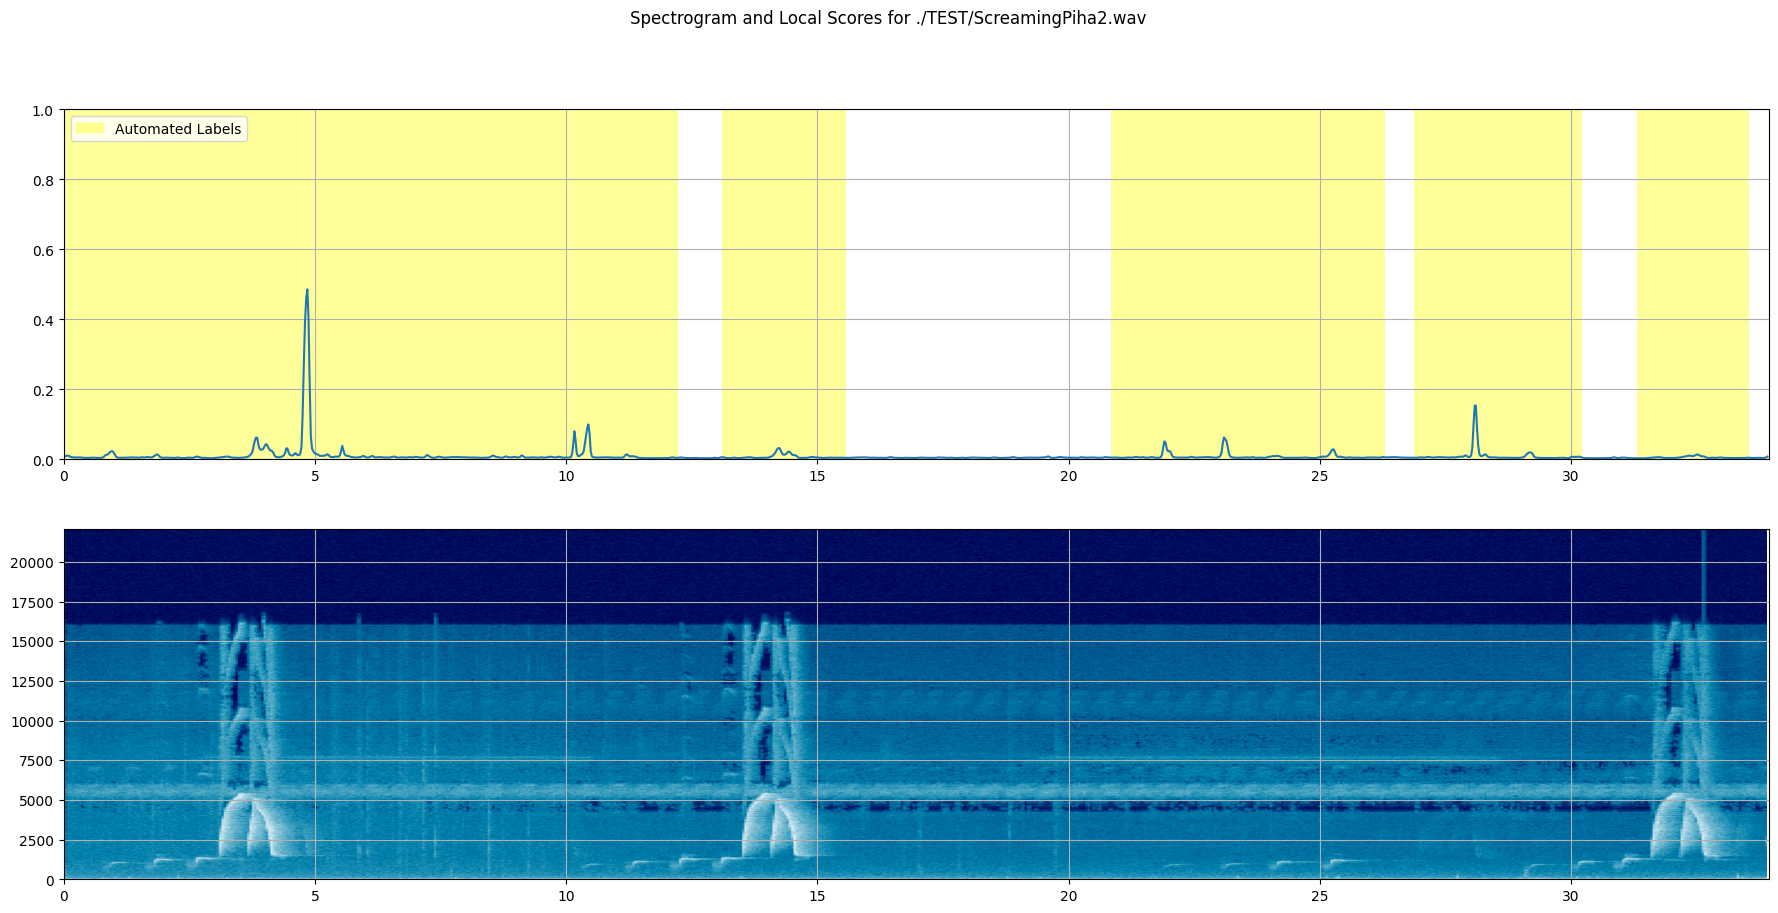

In [ ]:
spectrogram_visualization(clip_path,build_automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

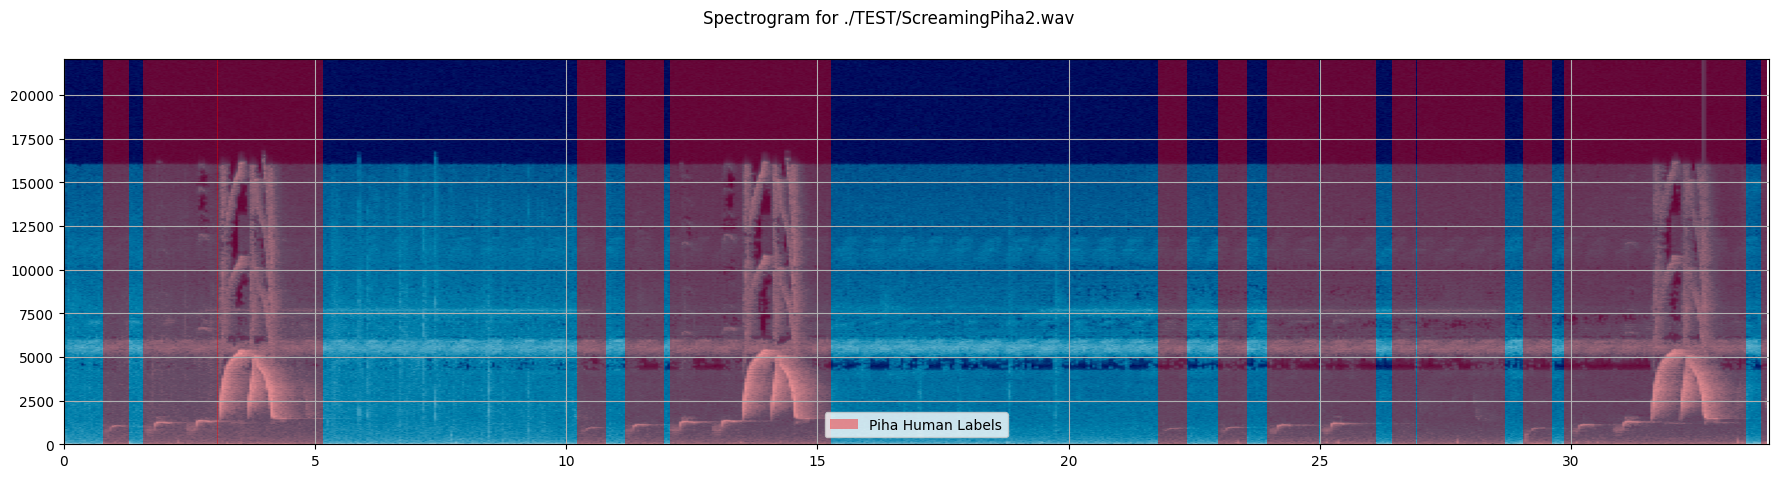

In [ ]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

1/1 [==============================] - 0s 471ms/step


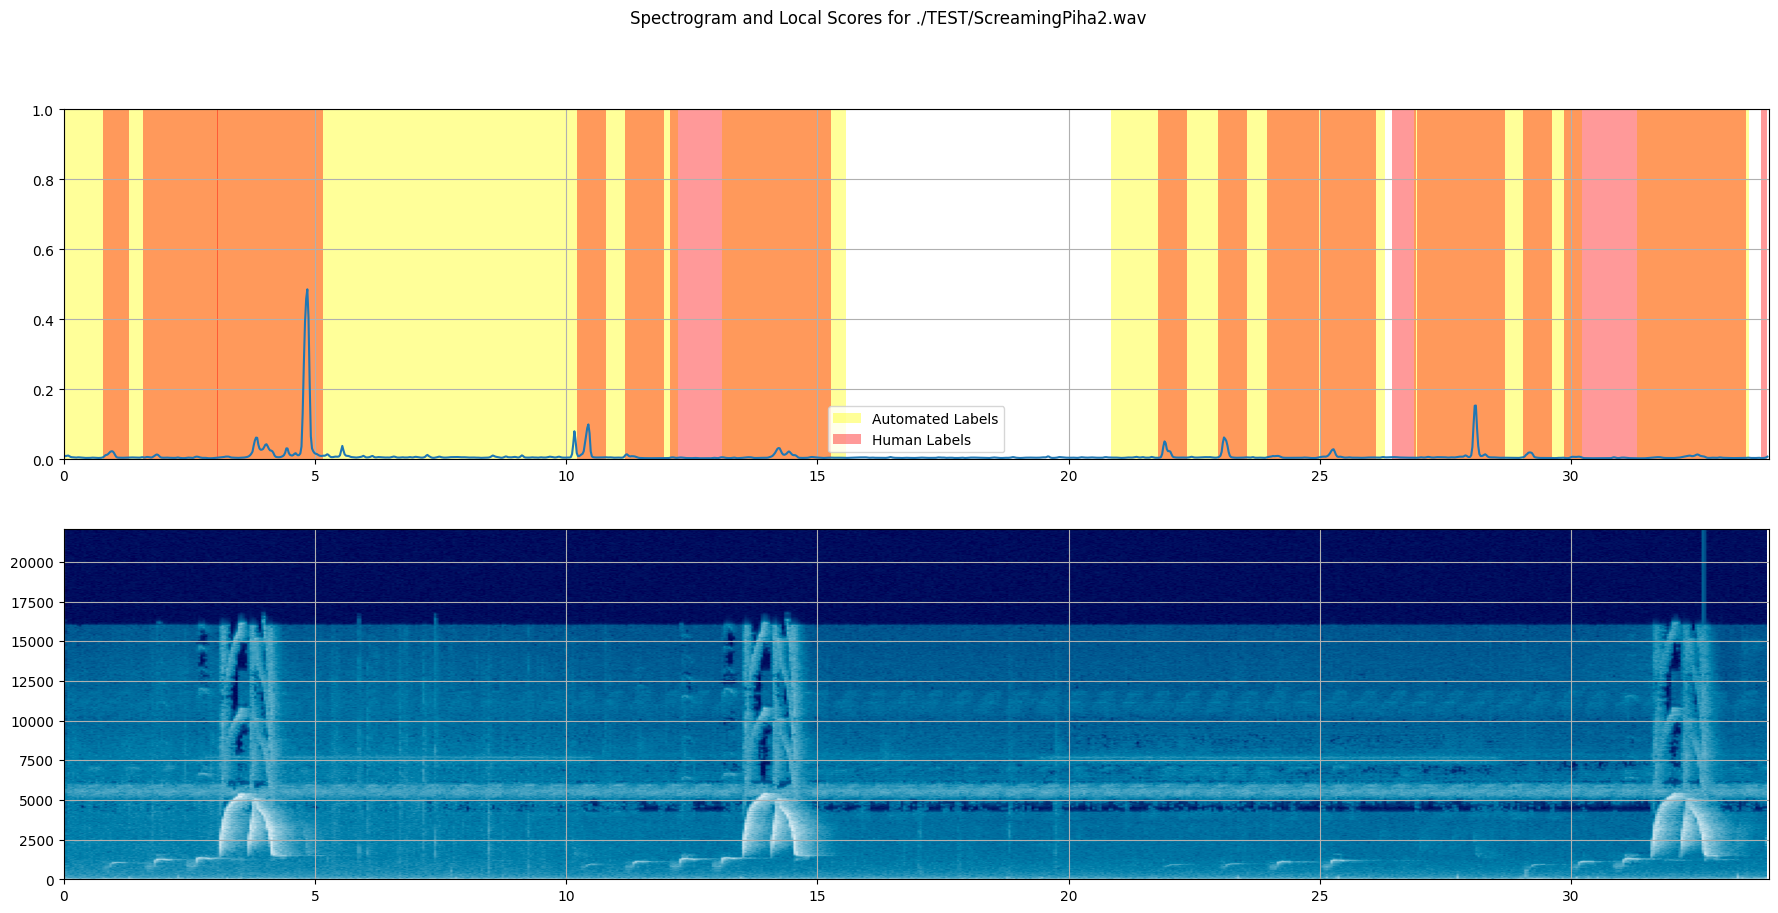

In [ ]:
spectrogram_visualization(clip_path,build_automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

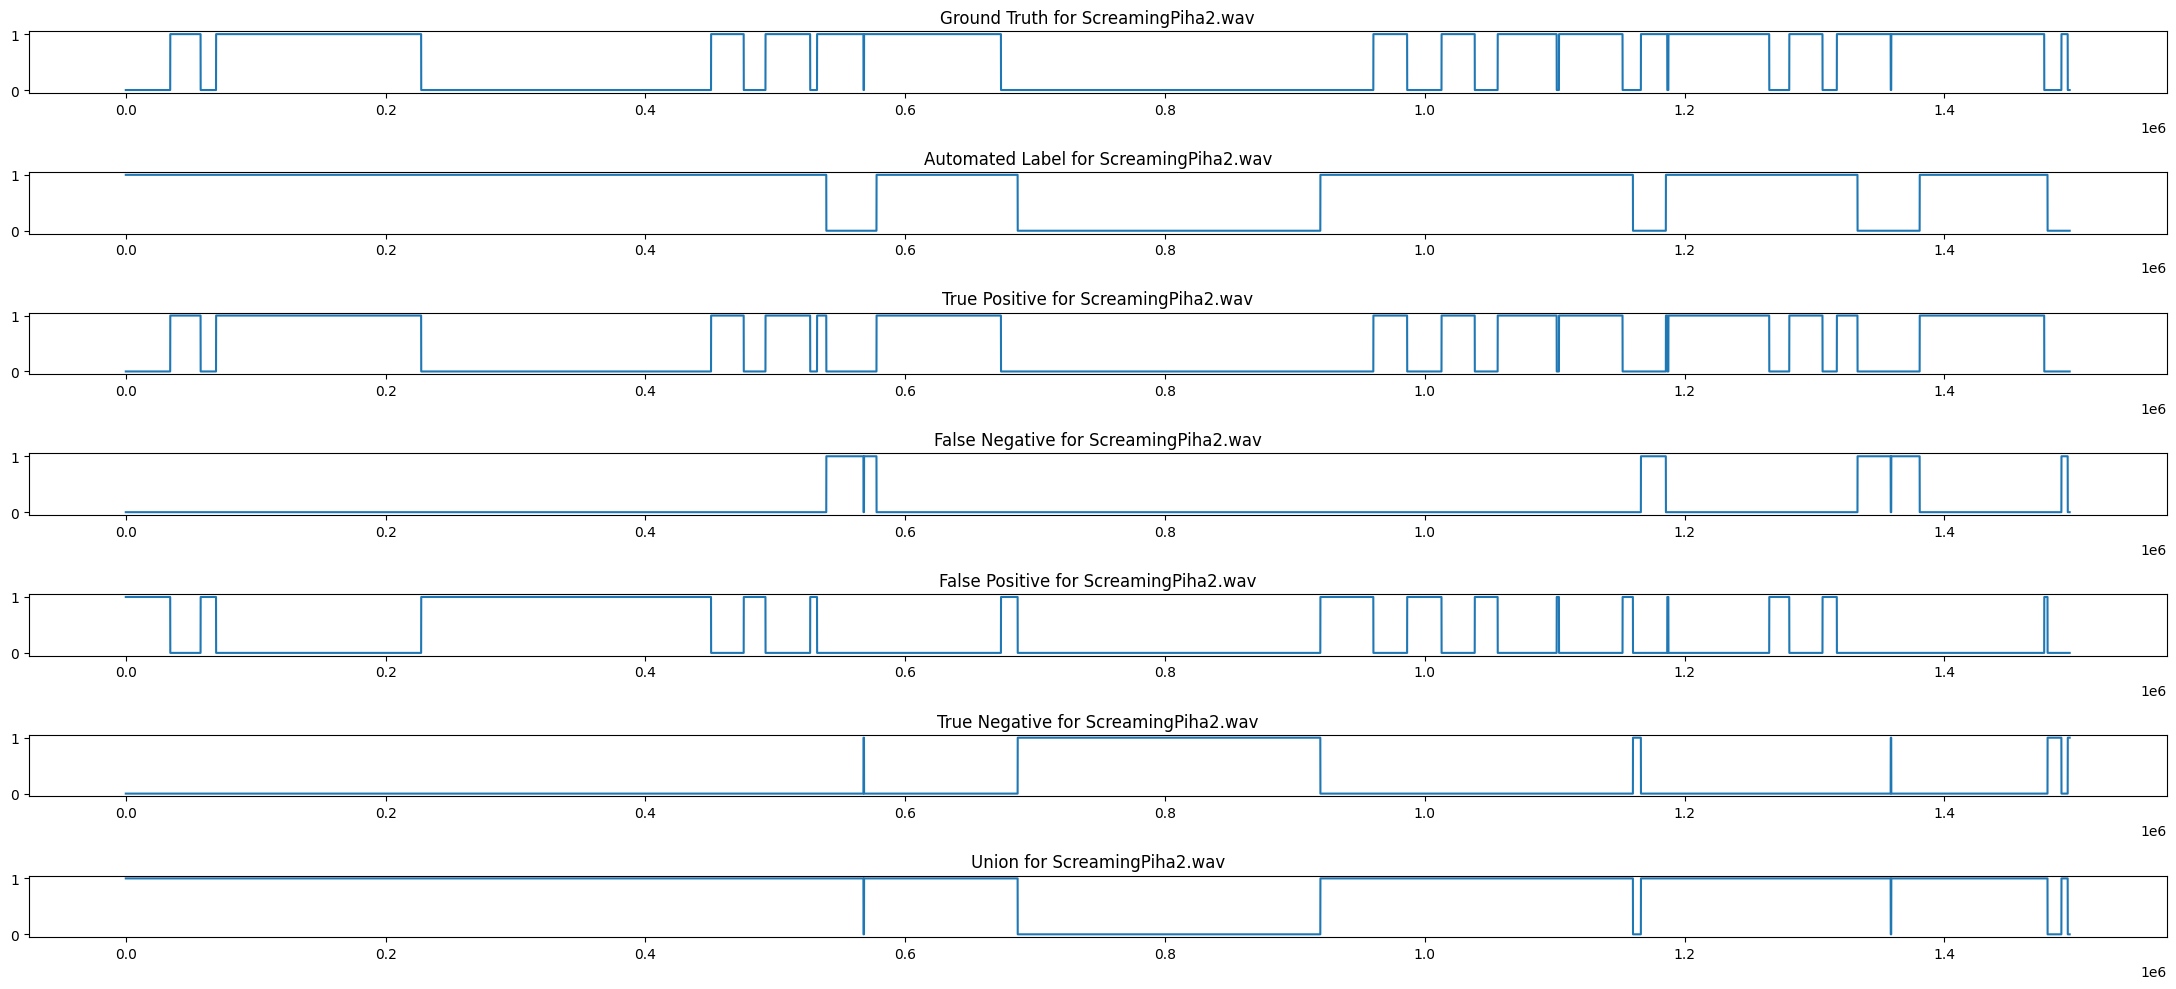

In [ ]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

TypeError: can only concatenate str (not "int") to str

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

MANUAL ID  PRECISION   RECALL        F1  Global IoU
0      bird   0.492163  0.89402  0.634842    0.465032

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.0532 0.     0.     0.     0.    ]
 [0.1718 0.     0.     0.     0.    ]
 [0.0433 0.     0.     0.     0.    ]
 [0.0466 0.     0.     0.     0.    ]
 [0.0695 0.     0.     0.     0.    ]
 [0.0638 0.     0.     0.     0.    ]
 [0.0125 0.     0.     0.     0.    ]
 [0.     0.1425 0.     0.     0.    ]
 [0.     0.     0.1081 0.     0.    ]
 [0.     0.7306 0.     0.     0.    ]
 [0.     0.     0.1888 0.     0.    ]
 [0.     0.     0.1063 0.     0.    ]
 [0.     0.     0.2034 0.     0.    ]
 [0.     0.     0.     0.0064 0.    ]
 [0.     0.     0.     0.1734 0.    ]
 [0.     0.     0.     0.5261 0.    ]
 [0.     0.     0.     0.     0.0821]
 [0.     0.     0.     0.0919 0.    ]
 [0.     0.     0.     0.     0.8738]
 [0.     0.     0.     0.     0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

FOLDER             IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0  ./TEST/  ScreamingPiha2.wav      bird              3              17   

   FALSE POSITIVE  PRECISION  RECALL    F1  
0               2        0.6    0.15  0.24

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0   ./TEST/   ScreamingPiha7.wav      bird              0              51   
1   ./TEST/   ScreamingPiha2.wav      bird              3              17   
2   ./TEST/   ScreamingPiha6.wav      bird              0              19   
3   ./TEST/   ScreamingPiha1.wav      bird              0              88   
4   ./TEST/  ScreamingPiha10.wav      bird              2              38   
5   ./TEST/   ScreamingPiha4.wav      bird              0               8   
6   ./TEST/  ScreamingPiha11.wav      bird              0              35   
7   ./TEST/   ScreamingPiha8.wav      bird              0               9   
8   ./TEST/   ScreamingPiha5.wav      bird              0              30   
9   ./TEST/   ScreamingPiha9.wav      bird              2              21   
10  ./TEST/   ScreamingPiha3.wav      bird              0               6   

    FALSE POSITIVE  PRECISION  RECALL      F1  
0                7     0.0000   0.000  0.0000  
1                2     0.6000   0.150  0.2400  
2                7     0.0000   0.000  0.0000  
3                4     0.0000   0.000  0.0000  
4               11     0.1538   0.050  0.0755  
5                1     0.0000   0.000  0.0000  
6                8     0.0000   0.000  0.0000  
7                3     0.0000   0.000  0.0000  
8                5     0.0000   0.000  0.0000  
9                3     0.4000   0.087  0.1429  
10               1     0.0000   0.000  0.0000

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_statistics(stats_df)
global_stats_df

MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  FALSE POSITIVE  PRECISION  RECALL  \
0       N/A              7             322              52     0.1186  0.0213   

       F1  
0  0.0361